In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Копия БД SLM (образец).xlsx')

In [3]:
data.head()

,ID,Марка,Группа материала,Класс,Отрасль применения,Область применения,Форма частиц,Cредний размер частиц. мкм (объемное распределение),Шероховатость поверхности. мкм (после построения),Защитная среда,...,Предел прочности. МПа,Температура плавления. ⁰С,Максимальная температура применения составляет. ⁰С,Разница значение осей\nэквивалентного эллипса гранул W. мкм,Площадь\nповерхности гранулы S пов.\nмкм²,Площадь\nпроекции гранулы S экв.\nмкм²,Минимальная рекомендуемая толщина слоя. мкм,Минимальная толщина стенки. мм,Методы изготовления порошка,Фирмы производители и поставщики
0,1,AlSi10Mg (DE),Металл,Алюминиевый сплав,Аэрокосмическая отрасль. \nавтомобильная промы...,Изготовление тонкостенных деталей с невысокой ...,Сфероидная. характерно наличие мелких сателлит...,39.62,Ra 15 — 19\n Rz 30 — 40,аргон,...,397,590,500,2,49.199,46.612,30,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). EOS (DE). \nSLM Solution (...
1,2,316L (US),Металл,Нержавеющая сталь,Авиастроение.\n пищевая промышленность. \nхими...,Изготовление металлических рам для морской и ...,Сфероидная. характерно наличие мелких сателлит...,36.19,Ra 13 — 5 \nRz 80 — 20,азот,...,580,1440,550,1,35.912,34.712,25,0.4,Vacuum Induction Melt Inert Gas Atomization (V...,3D Systems (US). Realizer (DE).\n Phenix Syst...
2,3,Ti6Al4V (JP),Металл,Титановый сплав,Технология машиностроения. \nмедицина. \nавтом...,Изготовление биомеханических протезов и детале...,Сфероидная. характерно наличие мелких сателлит...,24.86,Ra 15 — 19\n Rz 96 — 115,аргон,...,570,1600,400,1,48.182,42.231,20,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). SLM Solutions (DE). \nRay...
3,4,Inconel 718 (US),Металл,Никельхромовый сплав,Ракетнокосмическая промышленность. авиастроение\n,Изготовление турбин и \nракетных двигателей,Сфероидная. характерно наличие мелких сателлит...,44.56,Ra 10 — 15\n Rz 50 — 90,азот,...,1200,1260,704,1,48.673,43.198,20,0.3,Vacuum Induction Melt Inert Gas Atomization (V...,Special Metals Corporation (US). \nSLM Solut...
4,5,PA12 (DE),Полимер,Полиамид,Электротехническая. радиотехническая. автомоб...,Трубки. фитинги. шланги. штуцеры. крышки,Сфероидная. характерно наличие мелких сателлит...,38.51,Ra 10 — 11\n Rz 30 — 50,нет,...,100,178,120,1,38.911,35.129,30,0.8,Vacuum Induction Melt Inert Gas Atomization (V...,Hangzhou Guozhen Wanxin Coating \nEquipments M...


In [5]:
elements = [f for f in data.columns if '%' in f]
elem = data[elements]

In [53]:
elem.shape

(63, 28)

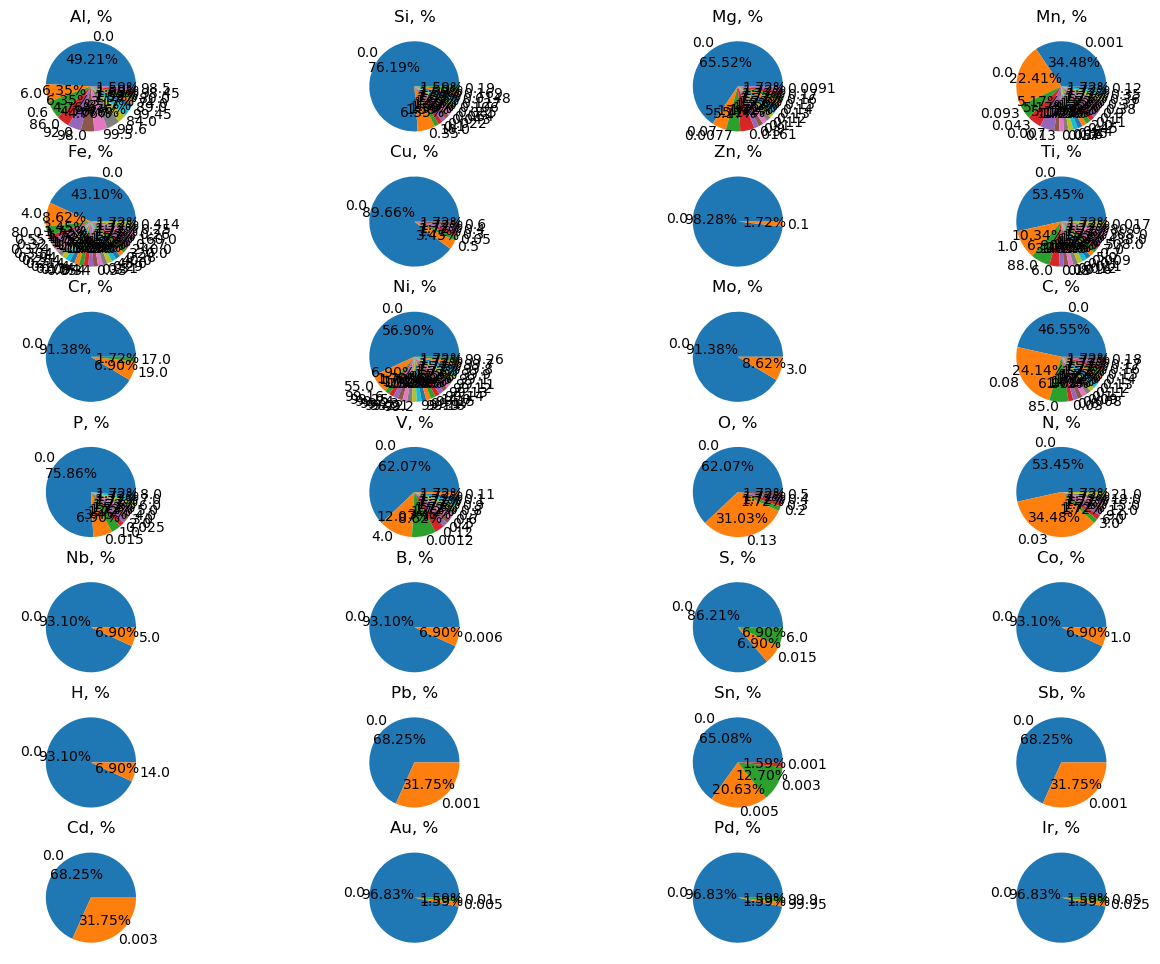

In [55]:
plt.figure(figsize=(16, 12))
plt.title('Частота появления элемента для разных материалов')
for i, col in enumerate(elem.columns):
    plt.subplot(7, 4, i+1)
    plt.pie(elem[col].value_counts(), autopct = "%0.2f%%", labels = elem[col].value_counts().keys())    
    plt.title(col)
plt.show()

<AxesSubplot:>

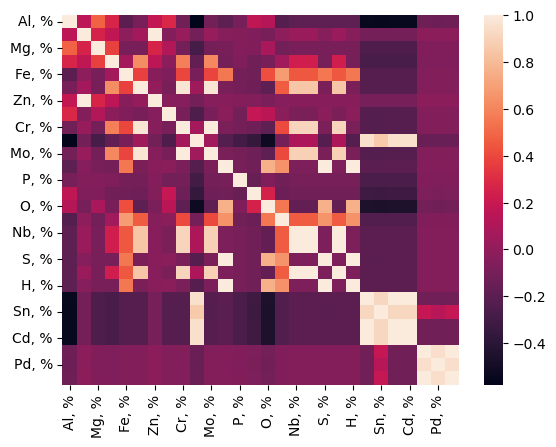

In [18]:
sns.heatmap(elem.corr())

# KNN

In [33]:
from sklearn import preprocessing 
from sklearn.datasets import make_blobs

In [6]:
# целевая переменная
y = data['Класс']
X = elem

In [11]:
X = X.fillna(0)

In [67]:
X.columns

Index(['Al, %', 'Si, %', 'Mg, %', 'Mn, %', 'Fe, %', 'Cu, %', 'Zn, %', 'Ti, %',
       'Cr, %', 'Ni, %', 'Mo, %', 'C, %', 'P, %', 'V, %', 'O, %', 'N, %',
       'Nb, %', 'B, %', 'S, %', 'Co, %', 'H, %', 'Pb, %', 'Sn, %', 'Sb, %',
       'Cd, %', 'Au, %', 'Pd, %', 'Ir, %'],
      dtype='object')

In [61]:
encoded_X=pd.get_dummies(X)

In [34]:
my_label = preprocessing.LabelEncoder()  
encoded_y= my_label.fit_transform(y)  

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split

knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

C:\Users\ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.631578947368421

# PCA

In [30]:
import numpy as np
from sklearn.decomposition import PCA

Projecting 28-dimensional data to 2D


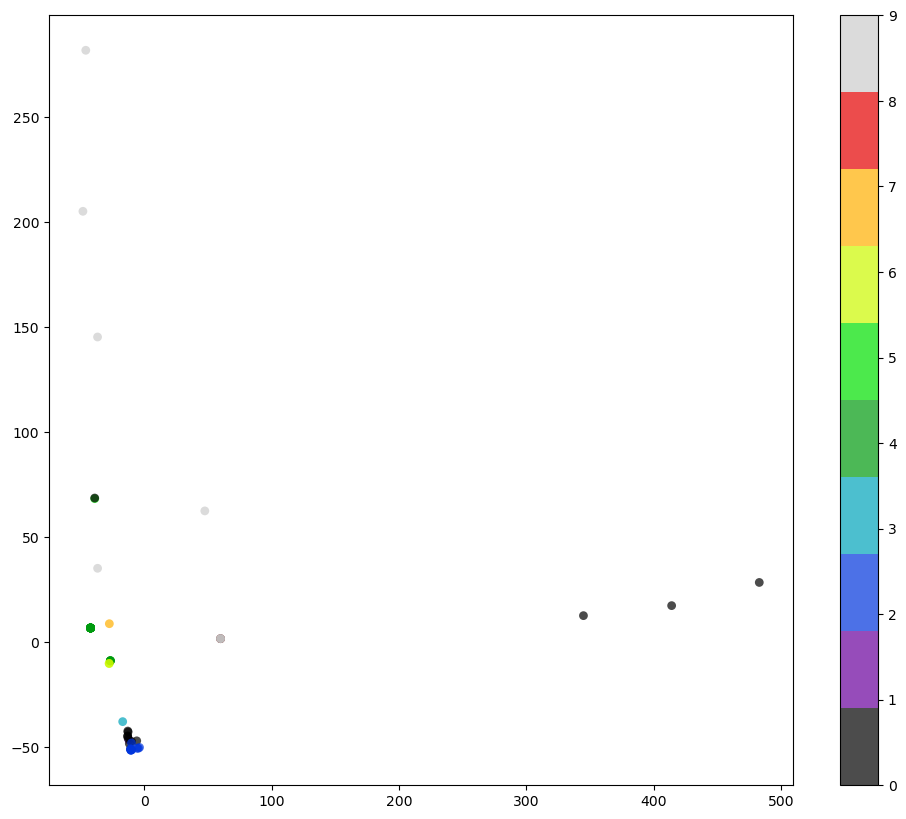

In [35]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=encoded_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

# RF

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [57]:
forest = RandomForestRegressor(random_state=17, n_estimators = 10)

In [59]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, encoded_y, test_size=0.3, random_state=17)

In [60]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=17)

In [61]:
print('MSE=%f' % np.sqrt(mean_squared_error(y_train, 
                                 forest.predict(X_train))))

MSE=1.032759


In [71]:
coef=forest.feature_importances_ #для леса - важность признака

pd.DataFrame(forest.feature_importances_, X.columns,
             columns=[ 'coef']).sort_values(by='coef', ascending=False)

,coef
"Al, %",0.408715
"N, %",0.191243
"Mn, %",0.161063
"Fe, %",0.095814
"Ni, %",0.041006
"Si, %",0.024857
"O, %",0.018475
"V, %",0.012865
"Cu, %",0.011617
"Cr, %",0.009201
